In [1]:
import numpy as np
import numpy.random as R
import matplotlib.pyplot as plt
import global_as

epsilon = 0.001
def dFunc(x):
    chi, dim = x.shape[0], x.shape[1]
    xe = np.tile(x.transpose(), dim).transpose()+np.repeat(np.array(np.identity(dim)*epsilon), chi, axis=0)
    return ((Func(xe)-np.tile(Func(x),dim))/epsilon).reshape(dim,chi)

In [2]:
dim = 10
theta = R.normal(0,1,dim)
theta /= sum(theta**2)**0.5

In [3]:
#Asian_stochastic
dim = 10
chi = 10000
def Func(x):
    return 1*(x@theta<0)

In [5]:
z = R.normal(0, 1, (chi, dim))
u0list = []
s0list = []
for epsilon in [0.1,0.001,10**-5]:
    deriv = dFunc(z)
    deriv /= np.sqrt(chi)
    u0, s0, vh0 = np.linalg.svd(deriv.astype(float), full_matrices=True) 
    s0 = s0**2
    if np.corrcoef(u0[:,0],theta)[0,1]<0: u0[:,0] = -u0[:,0]
    u0list.append(u0)
    s0list.append(s0)

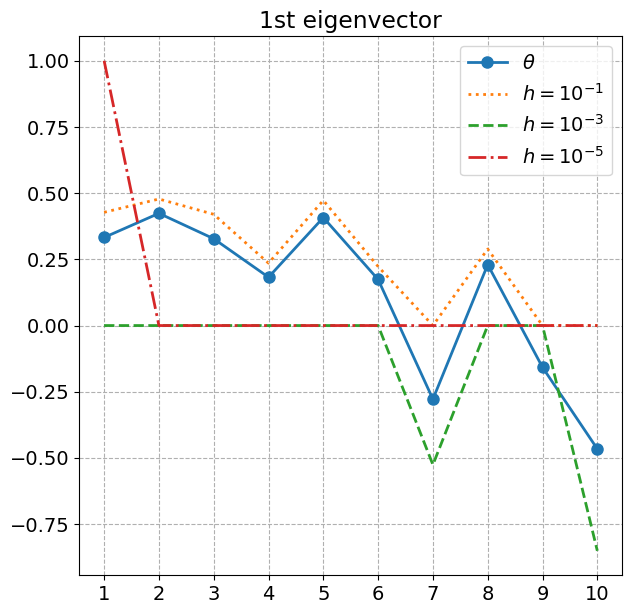

In [6]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7,7))
plt.rc('font')
k = s0.shape[0]
plt.plot(range(1 ,k+1), theta, 'o-',markersize=8,linewidth=2,label = r"$\theta$")
plt.plot(range(1 ,k+1), u0list[0][:,0], ':',markersize=12,linewidth=2,label = '$h=10^{-1}$')
plt.plot(range(1 ,k+1), u0list[1][:,0], '--',markersize=12,linewidth=2,label = '$h=10^{-3}$')
plt.plot(range(1 ,k+1), u0list[2][:,0], '-.',markersize=12,linewidth=2,label = '$h=10^{-5}$')

plt.title('1st eigenvector')
plt.grid(True,linestyle = '--')
plt.xticks(range(1, k+1))

plt.legend()
plt.show()

In [7]:
ulist = []
slist = []
for M2 in [1,10,100]:
    M1 = int(chi/M2)
    u0, s0 = global_as.GAS(Func,dim,chi,M1,M2,shiftedSobol=True)
    if np.corrcoef(u0[:,0],theta)[0,1]<0: u0[:,0] = -u0[:,0]
    ulist.append(u0)
    slist.append(s0)

/Users/yrl192/Library/Python/3.9/lib/python/site-packages/scipy/stats/_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


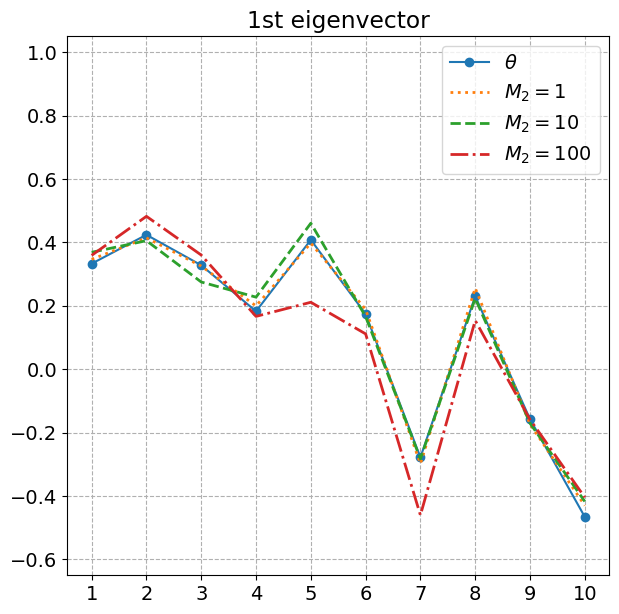

In [9]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(7,7))
plt.rc('font')
k = s0.shape[0]
plt.plot(range(1 ,k+1), theta, 'o-',label = r"$\theta$")
plt.plot(range(1 ,k+1), ulist[0][:,0], ':',markersize=12,linewidth=2,label = '$M_2=1$')
plt.plot(range(1 ,k+1), ulist[1][:,0], '--',markersize=12,linewidth=2,label = '$M_2=10$')
plt.plot(range(1 ,k+1), ulist[2][:,0], '-.',markersize=12,linewidth=2,label = '$M_2=100$')
plt.ylim(-0.65,1.05)

plt.title('1st eigenvector')
plt.grid(True,linestyle = '--')
plt.xticks(range(1, k+1))

plt.legend()
plt.show()